<h1><b>PRACTICAL 2</b></h1><h1>Data science and Visualization </h1><br><font color="black"><h3><font color="blue">NAME:</font> AAYUSHI DIGHE</h3><h3><b><font color="blue">PRN:</font> 72017865H</b></h3><h3><font color="blue">CLASS:</font> TE ENTC A</h3></font>

In this practical we will predict the probability os survival on the basis of age,gender and passenger class in titanic dataset.

*Firstly,we will import certain libraries.*

In [1]:
import numpy as np #This library provide support to the arrays
import seaborn as sns #Library for data visualization
import pandas as pd #for data manipulation

In [2]:
ds = sns.load_dataset('titanic') #The titanic dataset is already built in seaborn library

In [3]:
ds.head(10) #Displaying the first 10 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
len(ds) #To find the number of entries

891

## Data Cleaning

In [5]:
ds['age'] = ds['age'].fillna(ds['age'].median()) 
#The Null or Not Available values in the Age Column will be replaced by the median values

In [6]:
x = ds['age'].values  #x is Input
y = ds['survived']    #y is the output
# We will predicting the number of survived persons(y) on the basis of their age(x).

In [7]:
x.shape #checking the shape

(891,)

In [8]:
x=x.reshape(-1,1) #Reshaping the column.
# -1 indicates to keep 891 as it is and 1 indicates to add 1 to the shaoe of column.

In [9]:
x.shape

(891, 1)

**Data Cleaning part has been completed.**

## Splitting the data for Testing and Training

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
#test_size indicates how many samples should be present for test dataset.
#Therefore,25% of the entries will got to test dataset and the rest 75% will go to train dataset.

In [12]:
len(x_train)

668

In [13]:
len(y_train)

668

In [14]:
len(x_test)

223

In [15]:
from collections import Counter

<AxesSubplot:xlabel='survived', ylabel='count'>

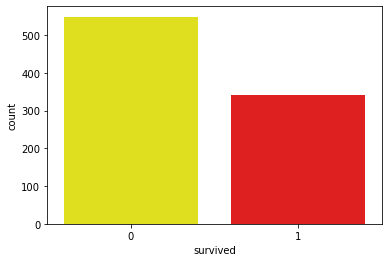

In [16]:
Counter(y)
sns.countplot(x=y,palette=['yellow','red'])

*The counter will count the number of individuals who have survived and those who have not survived.*

## Making the prediction using GaussianNB

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
model = GaussianNB()

In [19]:
model.fit(x_train,y_train) #Fitting the model

GaussianNB()

In [20]:
y_pred = model.predict_proba(x_test)  #Storing the predicted values in y_pred

In [21]:
y_pred

array([[0.62876821, 0.37123179],
       [0.62876821, 0.37123179],
       [0.51657653, 0.48342347],
       [0.62876821, 0.37123179],
       [0.63148867, 0.36851133],
       [0.62876821, 0.37123179],
       [0.64689984, 0.35310016],
       [0.63625703, 0.36374297],
       [0.6192395 , 0.3807605 ],
       [0.62876821, 0.37123179],
       [0.62264556, 0.37735444],
       [0.64689984, 0.35310016],
       [0.62876821, 0.37123179],
       [0.51657653, 0.48342347],
       [0.61560095, 0.38439905],
       [0.56600603, 0.43399397],
       [0.61172787, 0.38827213],
       [0.59385049, 0.40614951],
       [0.64314813, 0.35685187],
       [0.45943048, 0.54056952],
       [0.58877545, 0.41122455],
       [0.60761825, 0.39238175],
       [0.62876821, 0.37123179],
       [0.62876821, 0.37123179],
       [0.60761825, 0.39238175],
       [0.64689984, 0.35310016],
       [0.63830829, 0.36169171],
       [0.60761825, 0.39238175],
       [0.6192395 , 0.3807605 ],
       [0.47403058, 0.52596942],
       [0.

*The probability values are displayed.We need to convert them into binary values of 0 and 1.*

In [22]:
y_pred=model.predict(x_test)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [24]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: survived, Length: 223, dtype: int64

## Determing the accuracy

**Accuracy** is given by (True Positive+True Negative)/Total no. of entries

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_pred)

0.6547085201793722

**The accuracy of the model is 65.47%.**

*Hence we have predicted the survival on the basis of age.*

## Predicting the survival on the basis of pclass

In [27]:
x=ds['pclass'].values
y=ds['survived']

In [28]:
x=x.reshape(-1,1)

In [29]:
x.shape

(891, 1)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
#Updating all the values once again

In [31]:
model = GaussianNB()

In [32]:
model.fit(x_train,y_train)

GaussianNB()

In [33]:
model.predict_proba(x_test)

array([[0.7559945 , 0.2440055 ],
       [0.7559945 , 0.2440055 ],
       [0.7559945 , 0.2440055 ],
       [0.29957107, 0.70042893],
       [0.7559945 , 0.2440055 ],
       [0.29957107, 0.70042893],
       [0.29957107, 0.70042893],
       [0.29957107, 0.70042893],
       [0.29957107, 0.70042893],
       [0.7559945 , 0.2440055 ],
       [0.7559945 , 0.2440055 ],
       [0.58864036, 0.41135964],
       [0.7559945 , 0.2440055 ],
       [0.58864036, 0.41135964],
       [0.29957107, 0.70042893],
       [0.7559945 , 0.2440055 ],
       [0.7559945 , 0.2440055 ],
       [0.58864036, 0.41135964],
       [0.7559945 , 0.2440055 ],
       [0.7559945 , 0.2440055 ],
       [0.58864036, 0.41135964],
       [0.29957107, 0.70042893],
       [0.7559945 , 0.2440055 ],
       [0.29957107, 0.70042893],
       [0.7559945 , 0.2440055 ],
       [0.29957107, 0.70042893],
       [0.7559945 , 0.2440055 ],
       [0.7559945 , 0.2440055 ],
       [0.58864036, 0.41135964],
       [0.7559945 , 0.2440055 ],
       [0.

In [34]:
y_pred=model.predict(x_test)

**Determining the Accuracy**

In [35]:
accuracy_score(y_test, y_pred)

0.7085201793721974

*The accuracy score is 70.85% compared to previous attribute.Hence,we can say that pclass attribute gives more accuarcy.*

## We will now use two columns and determine the accuracy

In [36]:
x = ds[['sex','pclass']]
y = ds['survived']

In [37]:
x['sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

*We will encode the entries in a certain format.*

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
enc=LabelEncoder()

In [40]:
x['sex']=enc.fit_transform(x['sex']) #Converting the strings into number

<ipython-input-40-73f7db3864a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex']=enc.fit_transform(x['sex']) #Converting the strings into number


In [41]:
x['sex'].head() #male-1 female-0

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int32

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [43]:
model=GaussianNB()

In [44]:
model.fit(x_train,y_train)

GaussianNB()

In [45]:
model.predict_proba(x_test)

array([[0.91599965, 0.08400035],
       [0.91599965, 0.08400035],
       [0.91599965, 0.08400035],
       [0.03226176, 0.96773824],
       [0.19452137, 0.80547863],
       [0.60085059, 0.39914941],
       [0.03226176, 0.96773824],
       [0.03226176, 0.96773824],
       [0.60085059, 0.39914941],
       [0.19452137, 0.80547863],
       [0.91599965, 0.08400035],
       [0.1003456 , 0.8996544 ],
       [0.91599965, 0.08400035],
       [0.1003456 , 0.8996544 ],
       [0.03226176, 0.96773824],
       [0.19452137, 0.80547863],
       [0.91599965, 0.08400035],
       [0.83433941, 0.16566059],
       [0.91599965, 0.08400035],
       [0.91599965, 0.08400035],
       [0.83433941, 0.16566059],
       [0.03226176, 0.96773824],
       [0.91599965, 0.08400035],
       [0.60085059, 0.39914941],
       [0.19452137, 0.80547863],
       [0.03226176, 0.96773824],
       [0.91599965, 0.08400035],
       [0.19452137, 0.80547863],
       [0.1003456 , 0.8996544 ],
       [0.19452137, 0.80547863],
       [0.

**By using two variables/attributes we can predict the result more accurately;therefore always use subset of two variables which provide most accurate result.**

In [46]:
y_pred=model.predict(x_test)

**Determining the accuracy**

In [47]:
accuracy_score(y_test, y_pred)

0.7802690582959642

**Therefore by using the relevant columns we can predict the result with more accuracy.**

<br>